In [1]:
#imports
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns

In [ ]:
pd.options.display.max_rows = 50

In [17]:
df = pd.read_csv("C:/Users/serav/Documents/UBC/SUMMER 2021/TERM 2/DATA 301/project-group-30/data/raw/police_killings.csv", encoding = "ISO-8859-1")

In [19]:
#remove 21 columns

df = df.drop(['name', 'day', 'year','h_income','county_income', 'comp_income','county_bucket', 'nat_bucket', 'share_black', 'share_hispanic', 'college', 'streetaddress', 'city', 'latitude', 'longitude', 'state_fp', 'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad', 'lawenforcementagency'], axis =1)

In [20]:
#remove rows with missing values

df = df.dropna().reset_index(drop=True) 

In [21]:
#remove rows that have 'age'='Unkown'

indexNames = df[df['age'] == 'Unknown' ].index
df= df.drop(index=indexNames)

In [22]:
#change column name of 'p_income'
df = df.rename(columns = {"p_income": "income"})

In [23]:
#change data type of 'age', 'p_income', 'pov', and 'share_white' into integer

df["age"] = df['age'].astype('int')
df["income"] = df['income'].astype('int')
df["pov"] = df['pov'].astype('float')
df["share_white"] = df['share_white'].astype('float')

#round data in 'urate' to 2 decimal places
df['urate']=df['urate'].round(decimals = 2)

In [24]:
df.describe()

,age,pop,share_white,income,pov,urate
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,37.303688,4777.034707,51.784165,24310.950108,21.139046,0.118221
std,12.969151,2344.011553,29.924650,9059.109897,13.269990,0.069316
min,16.000000,403.000000,0.000000,5457.000000,1.100000,0.010000
25%,28.000000,3358.000000,26.200000,18243.000000,10.900000,0.070000
50%,35.000000,4430.000000,56.400000,22235.000000,18.400000,0.110000
75%,45.000000,5787.000000,77.300000,28690.000000,28.800000,0.140000
max,87.000000,26826.000000,99.600000,86023.000000,79.200000,0.510000


In [25]:
df['raceethnicity'].value_counts(0)

White                     235
Black                     133
Hispanic/Latino            66
Unknown                    13
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

In [26]:
df.dtypes

age                int32
gender            object
raceethnicity     object
month             object
state             object
cause             object
armed             object
pop                int64
share_white      float64
income             int32
pov              float64
urate            float64
dtype: object

<AxesSubplot:ylabel='share_white'>

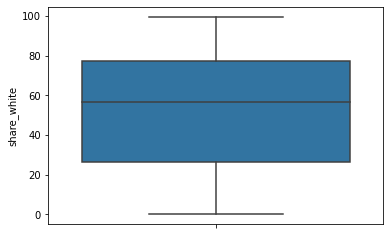

In [27]:
sns.boxplot(y='share_white', data=df)

In [28]:
#categorize 'age'

age_labels = [f"{i} - {i+9}" for i in range(10,80,10)]
df['age_group'] = pd.cut(df['age'], range(10, 90, 10), right=False,labels=age_labels)

#categorize 'population'
pop_labels = [f"{i} - {i+1000}" for i in range(0,27000,1000)]
df['pop_size'] = pd.cut(df['pop'], range(0, 28000, 1000), right=False, labels=pop_labels)

#categorize 'income'
income_labels = [f"{i} - {i+1000}" for i in range(5000,87000,1000)]
df['income_bracket'] = pd.cut(df['income'], range(5000,88000,1000), right=False, labels=income_labels)

#categorize 'urate'
urate_labels = ['0.0 - 0.05', '0.06 - 0.08', '0.09 - 0.11', '0.12 - 0.15', '0.15 - 0.51']
df['urate_level'] = pd.qcut(x = df['urate'], q= 5, precision = 2, labels=urate_labels)

#categorize 'share_white'
SW_labels = ['Low', 'Medium', 'Half', 'High', 'Very High']
df['SW_level'] = pd.qcut(x = df['share_white'], q= 5, precision = 1, labels=SW_labels)

In [29]:
df

,age,gender,raceethnicity,month,state,cause,armed,pop,share_white,income,pov,urate,age_group,pop_size,income_bracket,urate_level,SW_level
0,16,Male,Black,February,AL,Gunshot,No,3779,60.5,28375,14.1,0.10,10 - 19,3000 - 4000,28000 - 29000,0.09 - 0.11,Half
1,27,Male,White,April,LA,Gunshot,No,2769,53.8,14678,28.8,0.07,20 - 29,2000 - 3000,14000 - 15000,0.06 - 0.08,Half
2,26,Male,White,March,WI,Gunshot,No,4079,73.8,25286,14.6,0.17,20 - 29,4000 - 5000,25000 - 26000,0.15 - 0.51,High
3,25,Male,Hispanic/Latino,March,CA,Gunshot,Firearm,4343,1.2,17194,11.7,0.12,20 - 29,4000 - 5000,17000 - 18000,0.09 - 0.11,Low
4,29,Male,White,March,OH,Gunshot,No,6809,92.5,33954,1.9,0.06,20 - 29,6000 - 7000,33000 - 34000,0.0 - 0.05,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,18,Male,Black,April,VA,Gunshot,No,1640,40.9,25262,35.2,0.15,10 - 19,1000 - 2000,25000 - 26000,0.12 - 0.15,Medium
461,28,Male,Native American,April,WA,Taser,Firearm,4154,74.5,18470,27.3,0.13,20 - 29,4000 - 5000,18000 - 19000,0.12 - 0.15,High
462,52,Male,White,March,NC,Gunshot,Firearm,3850,83.2,21175,28.5,0.26,50 - 59,3000 - 4000,21000 - 22000,0.15 - 0.51,Very High
463,38,Female,Black,February,CA,Gunshot,Firearm,2544,21.7,26971,23.9,0.07,30 - 39,2000 - 3000,26000 - 27000,0.06 - 0.08,Medium


In [50]:
#method chain 1 (load and Clean data)
#indexNames = df[df['age'] == 'Unknown' ].index
df = (
    pd.read_csv("C:/Users/serav/Documents/UBC/SUMMER 2021/TERM 2/DATA 301/project-group-30/data/raw/police_killings.csv", encoding = "ISO-8859-1")
    .drop(['name', 'day', 'year','h_income','county_income', 'comp_income','county_bucket', 'share_black', 'share_hispanic', 'college', 'streetaddress', 'city', 'latitude', 'longitude', 'state_fp', 'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad', 'lawenforcementagency'], axis =1)
    .dropna().reset_index(drop=True)
    #.drop(index= df[df['age'] == 'Unknown' ].index)
    .rename(columns={"p_income": "income"})
    #['age'].astype('int')
)
df
#df["age"] = df['age'].astype('int')
#df["income"] = df['income'].astype('int')
#df["pov"] = df['pov'].astype('float')
#df["share_white"] = df['share_white'].astype('float')

#round data in 'urate' to 2 decimal places
#df['urate']=df['urate'].round(decimals = 2)

,age,gender,raceethnicity,month,state,cause,armed,pop,share_white,income,nat_bucket,pov,urate
0,16,Male,Black,February,AL,Gunshot,No,3779,60.5,28375,3.0,14.1,0.097686
1,27,Male,White,April,LA,Gunshot,No,2769,53.8,14678,1.0,28.8,0.065724
2,26,Male,White,March,WI,Gunshot,No,4079,73.8,25286,3.0,14.6,0.166293
3,25,Male,Hispanic/Latino,March,CA,Gunshot,Firearm,4343,1.2,17194,3.0,11.7,0.124827
4,29,Male,White,March,OH,Gunshot,No,6809,92.5,33954,4.0,1.9,0.063550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,18,Male,Black,April,VA,Gunshot,No,1640,40.9,25262,1.0,35.2,0.152047
461,28,Male,Native American,April,WA,Taser,Firearm,4154,74.5,18470,2.0,27.3,0.133650
462,52,Male,White,March,NC,Gunshot,Firearm,3850,83.2,21175,2.0,28.5,0.256150
463,38,Female,Black,February,CA,Gunshot,Firearm,2544,21.7,26971,4.0,23.9,0.069601


In [52]:
age_labels = [f"{i} - {i+9}" for i in range(10,80,10)]
pop_labels = [f"{i} - {i+1000}" for i in range(0,27000,1000)]
income_labels = [f"{i} - {i+1000}" for i in range(5000,87000,1000)]
urate_labels = ['0.0 - 0.05', '0.06 - 0.08', '0.09 - 0.11', '0.12 - 0.15', '0.15 - 0.51']
SW_labels = ['Low', 'Medium', 'Half', 'High', 'Very High']
df =(
    .assign(age_group = lambda df: pd.cut(pd.cut(df['age'], range(10, 90, 10), right=False,labels=age_labels)))
    .assign(pop_size = lambda df: pd.cut(df['pop'], range(0, 28000, 1000), right=False, labels=pop_labels))
    .assign(income = lambda df:pd.cut(df['p_income'], range(5000,88000,1000), right=False, labels=income_labels))
    .assign(urate = lambda df: pd.qcut(x = df['urate'], q= 5, precision = 2, labels=urate_labels))
    .assign(share_white = lambda df:pd.qcut(x = df['share_white'], q= 5, precision = 1, labels=SW_labels))
)


SyntaxError: invalid syntax (Temp/ipykernel_12908/3117457229.py, line 7)